In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/PoliceProject/checkpoint-4/clean_supervised_data.csv')
data.head()

,Unnamed: 0,Column,id,recc_finding,recc_outcome,final_finding,final_outcome,allegation_category_id,officer_id,disciplined,...,discipline_count,honorable_mention_count,major_award_count,trr_count,unsustained_count,incident_date,incident_in_2_years_bool,age_at_time_of_incident,days_experience,category_name
0,0,0,219949,SU,Reprimand,SU,Penalty Not Served,199.0,29856,False,...,4,5,0,0,1,2011-04-13 00:00:00+00,0,49.0,4419.0,Operation/Personnel Violations
1,1,1,221159,NaN,Unknown,NaN,Unknown,194.0,31923,NaN,...,1,30,1,2,7,2011-11-15 00:00:00+00,0,43.0,5825.0,Operation/Personnel Violations
2,2,2,222506,SU,Reprimand,SU,Reprimand,91.0,25965,True,...,2,25,0,2,2,2012-01-20 00:00:00+00,0,41.0,5981.0,Lockup Procedures
3,3,3,223815,NaN,Unknown,NaN,Unknown,NaN,4278,NaN,...,3,27,1,4,1,2012-04-25 00:00:00+00,0,35.0,4097.0,Unknown
4,4,4,187241,SU,1 Week or less Suspension,SU,Reprimand,173.0,17834,True,...,3,3,0,11,1,2007-08-09 00:00:00+00,1,29.0,2263.0,Conduct Unbecoming (Off-Duty)


# Data Pre-processing

In [ ]:
columns_to_keep = [#'Column', 
                   #'id', 
                   #'recc_finding', 
                   'recc_outcome', 
                   #'final_finding',
                    'final_outcome', 
                   #'allegation_category_id', 
                   #'officer_id', 
                   'disciplined', # has nAn
                   #'allegation_id', 
                   'gender', 
                   'race', 
                   #'appointed_date', 
                   #'rank', #???????????????????????
                   #'birth_year', 
                   'complaint_percentile', 
                   'civilian_allegation_percentile',
                   'honorable_mention_percentile', 
                   'internal_allegation_percentile',
                  #  'trr_percentile', # 500 nans i think
                   'allegation_count', 
                   'sustained_count',
                   'civilian_compliment_count', 
                   'current_salary', 
                   'discipline_count',
                   'honorable_mention_count', 
                   'major_award_count', 
                   'trr_count',
                   'unsustained_count', 
                   #'incident_date', 
                  #  'incident_in_2_years_bool', ################ LABEL
                   'age_at_time_of_incident', 
                   'days_experience', 
                   'category_name']

categorical_columns = [
                   #'recc_finding', 
                   'recc_outcome', 
                   #'final_finding',
                    'final_outcome', 
                   'disciplined', # has nAn
                   'gender', 
                   'race', 
                   #'rank', #??????????????????????? 
                   'category_name']

In [ ]:
data = data[data['days_experience'].notna()]
data = data[data['age_at_time_of_incident'].notna()]

X_old = data[columns_to_keep]
y = data['incident_in_2_years_bool']
print('X:', X_old.shape)
print('y:', y.shape)

X: (14207, 21)
y: (14207,)


# One-hot Encoding

In [ ]:
# Using make_column_transformer to One-Hot Encode 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from seaborn import load_dataset
import pandas as pd
import scipy

# (https://datagy.io/sklearn-one-hot-encode/)
transformer = make_column_transformer(
    (OneHotEncoder(), categorical_columns),
    remainder='passthrough')

transformed = transformer.fit_transform(X_old)
transformed_df = pd.DataFrame(
    transformed if not scipy.sparse.issparse(transformed) else transformed.toarray(), 
    columns=transformer.get_feature_names()
)
type(transformed)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


numpy.ndarray

In [ ]:
transformed_df.columns

Index(['onehotencoder__x0_1 Week or less Suspension',
       'onehotencoder__x0_1 Week to 1 Month Suspension',
       'onehotencoder__x0_No Action Taken',
       'onehotencoder__x0_Penalty Not Served',
       'onehotencoder__x0_Reinstated By Police Board',
       'onehotencoder__x0_Reprimand', 'onehotencoder__x0_Resigned',
       'onehotencoder__x0_Separation',
       'onehotencoder__x0_Suspended Over 30 Days', 'onehotencoder__x0_Unknown',
       'onehotencoder__x0_Violation Noted',
       'onehotencoder__x1_1 Week or less Suspension',
       'onehotencoder__x1_1 Week to 1 Month Suspension',
       'onehotencoder__x1_Administrative Termination',
       'onehotencoder__x1_No Action Taken',
       'onehotencoder__x1_Penalty Not Served',
       'onehotencoder__x1_Reinstated By Court Action',
       'onehotencoder__x1_Reinstated By Police Board',
       'onehotencoder__x1_Reprimand', 'onehotencoder__x1_Resigned',
       'onehotencoder__x1_Separation',
       'onehotencoder__x1_Suspended Ov

In [ ]:
X = transformed_df

# Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('X_train size:', X_train.shape)
print('y_train size:', y_train.shape)
print('X_test size:', X_test.shape)
print('y_test size:', y_test.shape)

X_train size: (9518, 69)
y_train size: (9518,)
X_test size: (4689, 69)
y_test size: (4689,)


# Test on Logistic Regression

In [ ]:

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.7833226700789081

# Grid Search: Logistic Regression


In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'C': np.logspace(-4, 4, 40).tolist() + [1],
              'penalty': ['l1', 'l2'],
              }

model = LogisticRegression(random_state=0, max_iter=500)
clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
205 fits failed out of a total of 410.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
205 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Sol

0.7901471529110684

In [ ]:
best_model_idx = np.nanargmax(clf.cv_results_['mean_test_score'])
print(best_model_idx)
print(len(clf.cv_results_['mean_test_score']))
print(clf.cv_results_['mean_test_score'][best_model_idx])
clf.cv_results_['params'][best_model_idx]

77
82
0.7867201058037508


{'C': 6235.507341273912, 'penalty': 'l2'}

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': np.linspace(1, 32, 8, endpoint=True),
              'min_samples_split': np.linspace(0.001, 0.1, 10, endpoint=True),  # np.linspace(0.1, 1.0, 10, endpoint=True)
              'min_samples_leaf': np.linspace(0.001, 0.1, 5, endpoint=True),   # np.linspace(0.1, 0.5, 5, endpoint=True)
              # 'max_features': list(range(1, X_train.shape[1]))
              }

model = DecisionTreeClassifier(random_state=0)
clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8059287694604393

In [ ]:
best_model_idx = np.nanargmax(clf.cv_results_['mean_test_score'])
print('best model idx:', best_model_idx)
print('number of models trained:', len(clf.cv_results_['mean_test_score']))
print('score:', clf.cv_results_['mean_test_score'][best_model_idx])
clf.cv_results_['params'][best_model_idx]

best model idx: 97
number of models trained: 192
score: 0.8012181672458789


{'max_depth': 21.666666666666668,
 'min_samples_leaf': 0.01,
 'min_samples_split': 0.01,
 'n_estimators': 100}

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [50,100,200],
              'max_depth': np.linspace(1, 32, 4, endpoint=True),
              'min_samples_split': np.logspace(-2, 0, 4),  # np.linspace(0.1, 1.0, 10, endpoint=True)
              'min_samples_leaf': np.logspace(-2, -0.32, 4),   # np.linspace(0.1, 0.5, 5, endpoint=True)
              # 'max_features': list(range(1, X_train.shape[1]))
              }


model = RandomForestClassifier(random_state=0)
clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8014502026018341

In [ ]:
best_model_idx = np.nanargmax(clf.cv_results_['mean_test_score'])
print('best model idx:', best_model_idx)
print('number of models trained:', len(clf.cv_results_['mean_test_score']))
print('score:', clf.cv_results_['mean_test_score'][best_model_idx])
clf.cv_results_['params'][best_model_idx]

best model idx: 97
number of models trained: 192
score: 0.8012181672458789


{'max_depth': 21.666666666666668,
 'min_samples_leaf': 0.01,
 'min_samples_split': 0.01,
 'n_estimators': 100}

best model idx: 97
number of models trained: 192
score: 0.8012181672458789
{'max_depth': 21.666666666666668,
 'min_samples_leaf': 0.01,
 'min_samples_split': 0.01,
 'n_estimators': 100}

# Gradient Boosting Classifer

In [ ]:
# TODO
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [50,100,200],
              'max_depth': np.linspace(1, 32, 4, endpoint=True),
              'min_samples_split': np.logspace(-2, 0, 4),  # np.linspace(0.1, 1.0, 10, endpoint=True)
              'min_samples_leaf': np.logspace(-2, -0.32, 4),   # np.linspace(0.1, 0.5, 5, endpoint=True)
              # 'max_features': list(range(1, X_train.shape[1]))
              }
model = GradientBoostingClassifier(random_state=0)
clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
best_model_idx = np.nanargmax(clf.cv_results_['mean_test_score'])
print('best model idx:', best_model_idx)
print('number of models trained:', len(clf.cv_results_['mean_test_score']))
print('score:', clf.cv_results_['mean_test_score'][best_model_idx])
clf.cv_results_['params'][best_model_idx]

best model idx: 2
number of models trained: 192
score: 0.8117255152192249
{'max_depth': 1.0,
 'min_samples_leaf': 0.01,
 'min_samples_split': 0.01,
 'n_estimators': 200}
 

# Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, max_iter=1000,
                     hidden_layer_sizes=(100, 10), random_state=1)

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.7713798251226274

# Use the best model: Gradient Boosting Classifier
And plot the importances of each feature in the classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
params={'max_depth': 1.0,
 'min_samples_leaf': 0.01,
 'min_samples_split': 0.01,
 'n_estimators': 200}
clf = GradientBoostingClassifier(random_state=0, max_depth=1.0, min_samples_leaf=0.01, min_samples_split=0.01, n_estimators=200)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8116869268500746

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cf = {'tn': cm[0, 0], 'fp': cm[0, 1], 'fn': cm[1, 0], 'tp': cm[1, 1]}



# calc percent of negatives guessed right tn / tn + fn
print('F1 Score:', f1_score(y_test, y_pred))
print('Accuracy on Negative Class:', cf['tn'] / (cf['tn'] + cf['fn']) )
print('Accuracy on Positive Class:', cf['tp'] / (cf['tp'] + cf['fp']) )
cf

F1 Score: 0.4463949843260189
Accuracy on Negative Class: 0.828132501200192
Accuracy on Positive Class: 0.6806883365200764


{'tn': 3450, 'fp': 167, 'fn': 716, 'tp': 356}

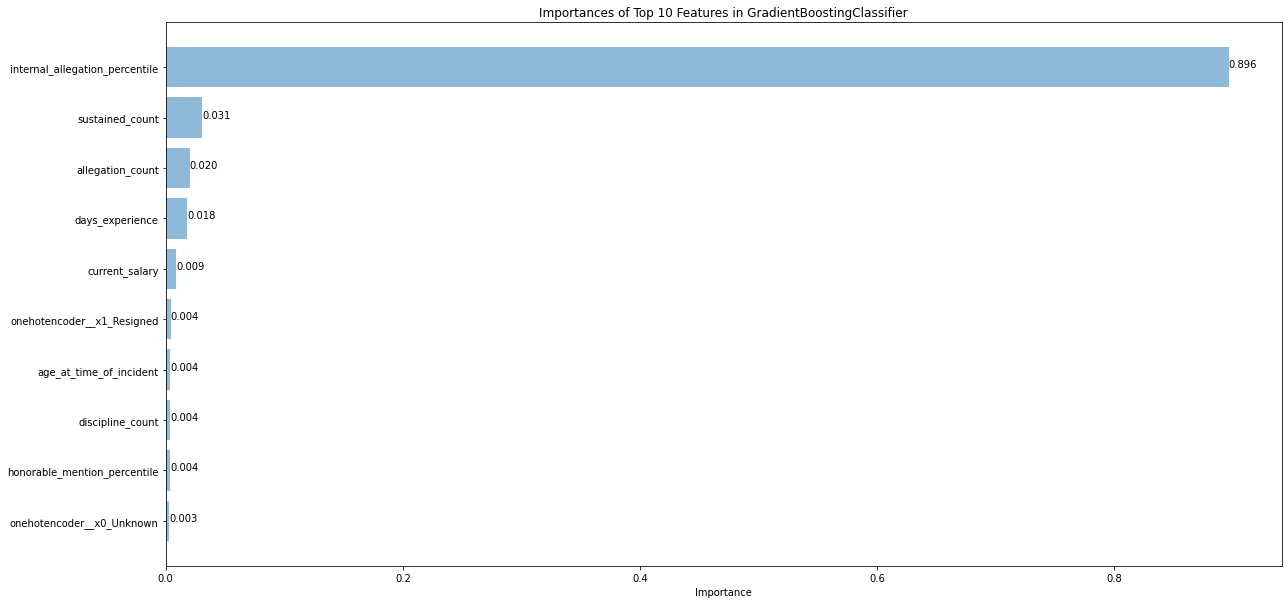

In [ ]:
importances = list( zip(clf.feature_importances_, X.columns) )
importances.sort(key = lambda x: x[0], reverse=True)

from matplotlib import pyplot as plt

val = list( list(zip(*importances[:10]))[0] )
label = list( list(zip(*importances[:10]))[1] )
val.reverse()
label.reverse()


f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

y_pos = np.arange(len(val))

plt.barh(y_pos, val, align='center', alpha=0.5)
plt.yticks(y_pos, label)
plt.xlabel('Importance')
plt.title('Importances of Top 10 Features in GradientBoostingClassifier')

# put text on bars
for index, value in enumerate(val):
    plt.text(value, index, str(format(value, '.3f')))

plt.show()

# TODO:
- split X into training/testing 80/20? 
- try different classifier models, maybe cross-validation grid search
- repeat until you get a good model 80%? 

Models:
- Logisitc Regression
- Decision Tree
- Random Forest
- Boosting
- GradientBoostingClassifier
- NN? out of scope?

- parameter importance? what features are weighted most in the decision in each model? plot this?


